In [2]:
from typing import Any, NamedTuple
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import cross_validate


# Type definitions from:
# https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file#parameters
class UciMlData(NamedTuple):
    ids: pd.DataFrame
    features: pd.DataFrame
    targets: pd.DataFrame
    original: pd.DataFrame
    headers: list[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: dict[str, Any]
    variables: pd.DataFrame

In [3]:
iris: UciMlDataset = fetch_ucirepo(id=53)

In [4]:
X_iris = iris.data.features
y_iris = iris.data.targets

display(X_iris.head())
display(y_iris.head())

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## Decision Tree Classifier on Iris Dataset with Default Parameters

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Visualize tree

In [12]:
def plot_iris_tree(
    clf: DecisionTreeClassifier, title: str = "Decision Tree for Iris Dataset"
):
    feature_names = list(X_iris.columns)
    class_names = ["setosa", "versicolor", "virginica"]
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
    # set title
    plt.title(title)
    plt.show()

    # tree statistics
    print(f"Number of nodes: {clf.tree_.node_count}")
    print(f"Depth of tree: {clf.get_depth()}")

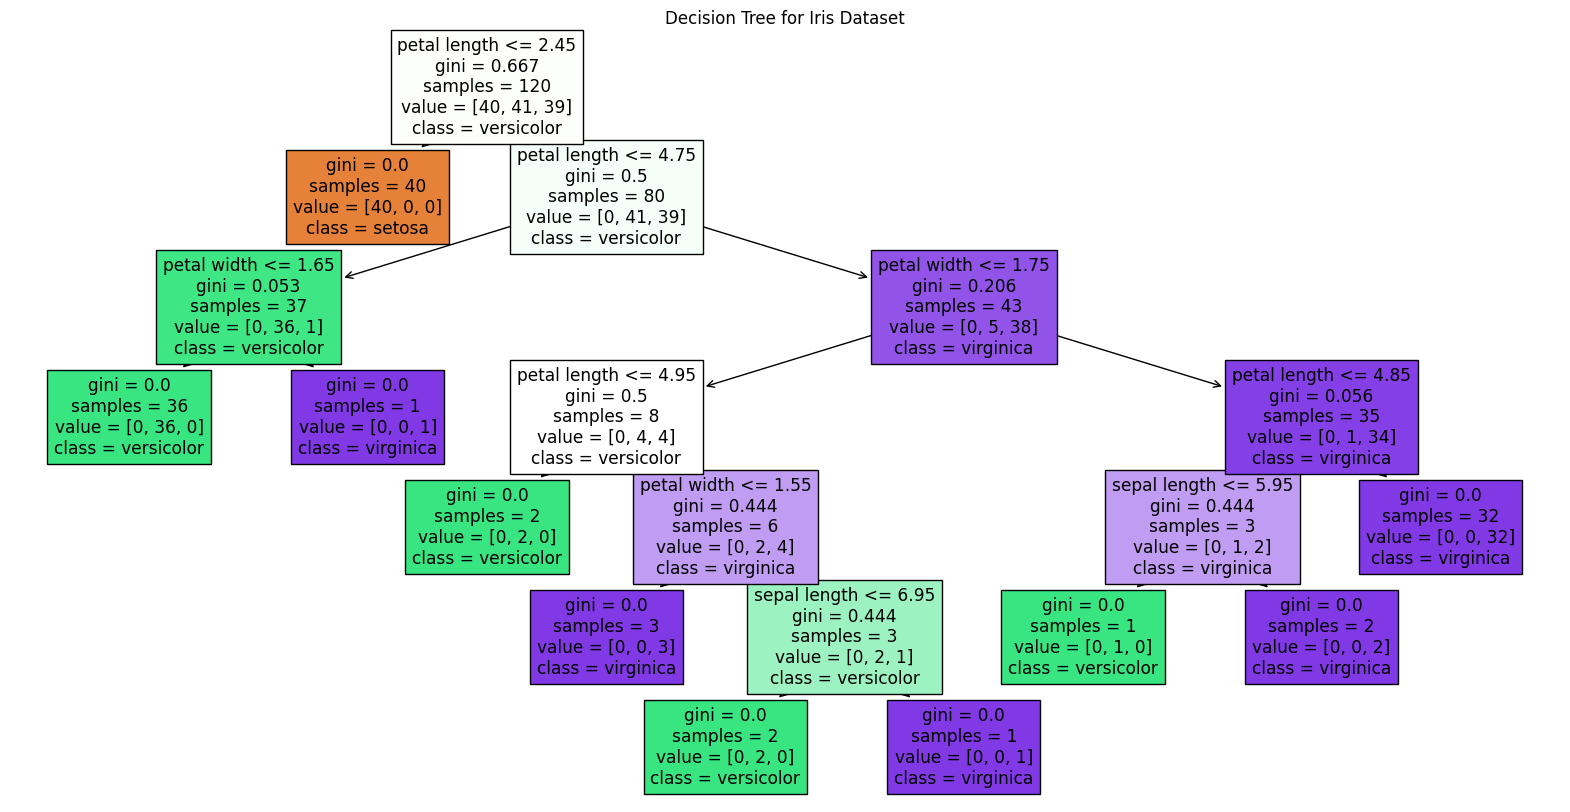

Number of nodes: 19
Depth of tree: 6


In [10]:
plot_iris_tree(clf)

## Visualize some decision trees with different params

### Max Depth

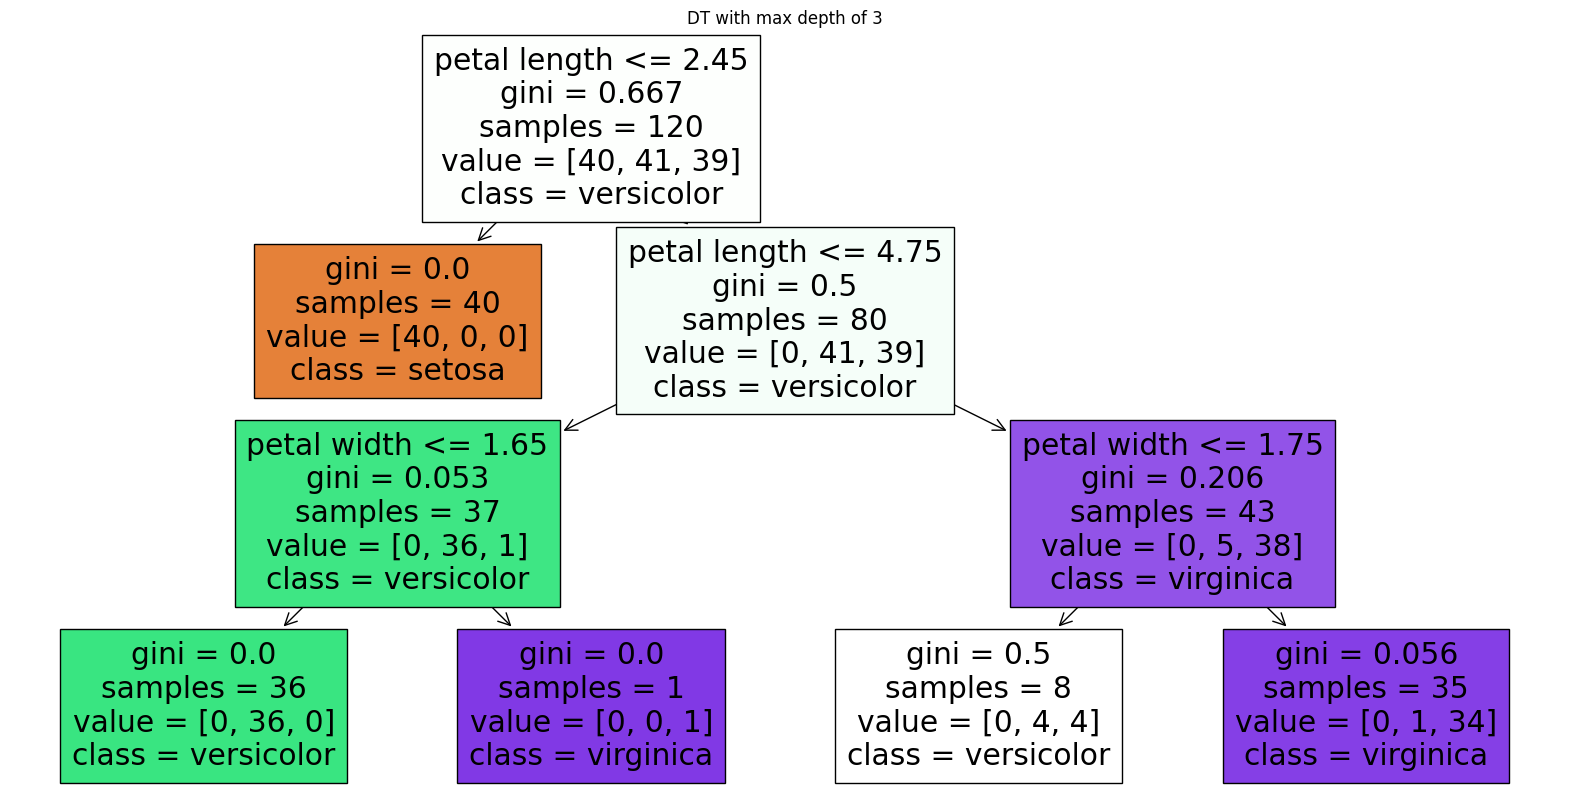

Number of nodes: 9
Depth of tree: 3
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



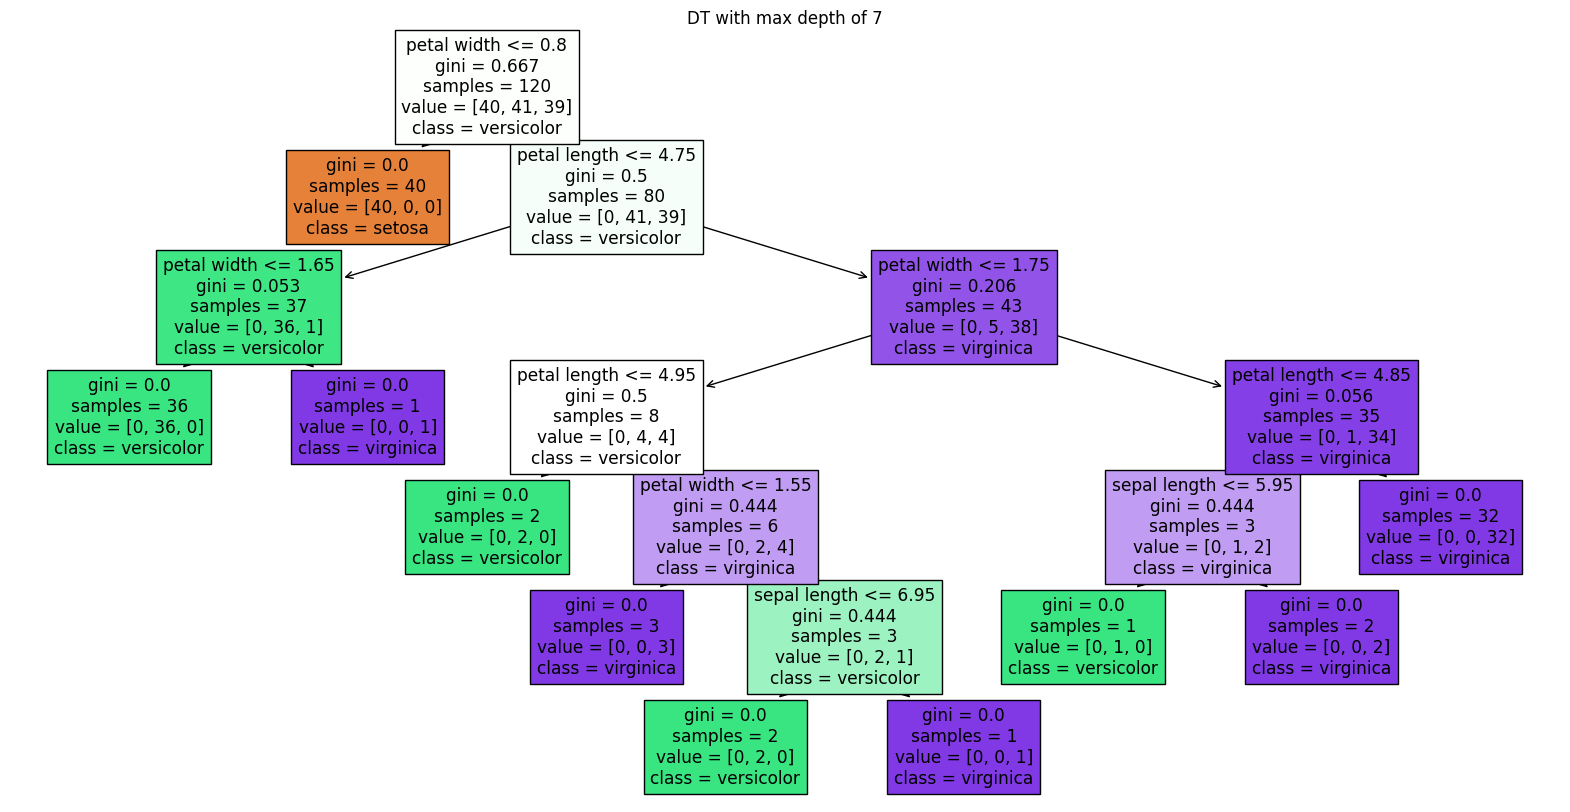

Number of nodes: 19
Depth of tree: 6
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
# max depth of 5
clf = DecisionTreeClassifier(
    ccp_alpha=0.0, criterion="gini", max_depth=3, min_samples_leaf=1
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_iris_tree(clf, "DT with max depth of 3")
# classification report
print(classification_report(y_test, y_pred))


# -----------

# Max depth of 7
clf = DecisionTreeClassifier(
    ccp_alpha=0.0, criterion="gini", max_depth=7, min_samples_leaf=1
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_iris_tree(clf, "DT with max depth of 7")

# classification report
print(classification_report(y_test, y_pred))

# max depth parameter conrols the depth of the tree

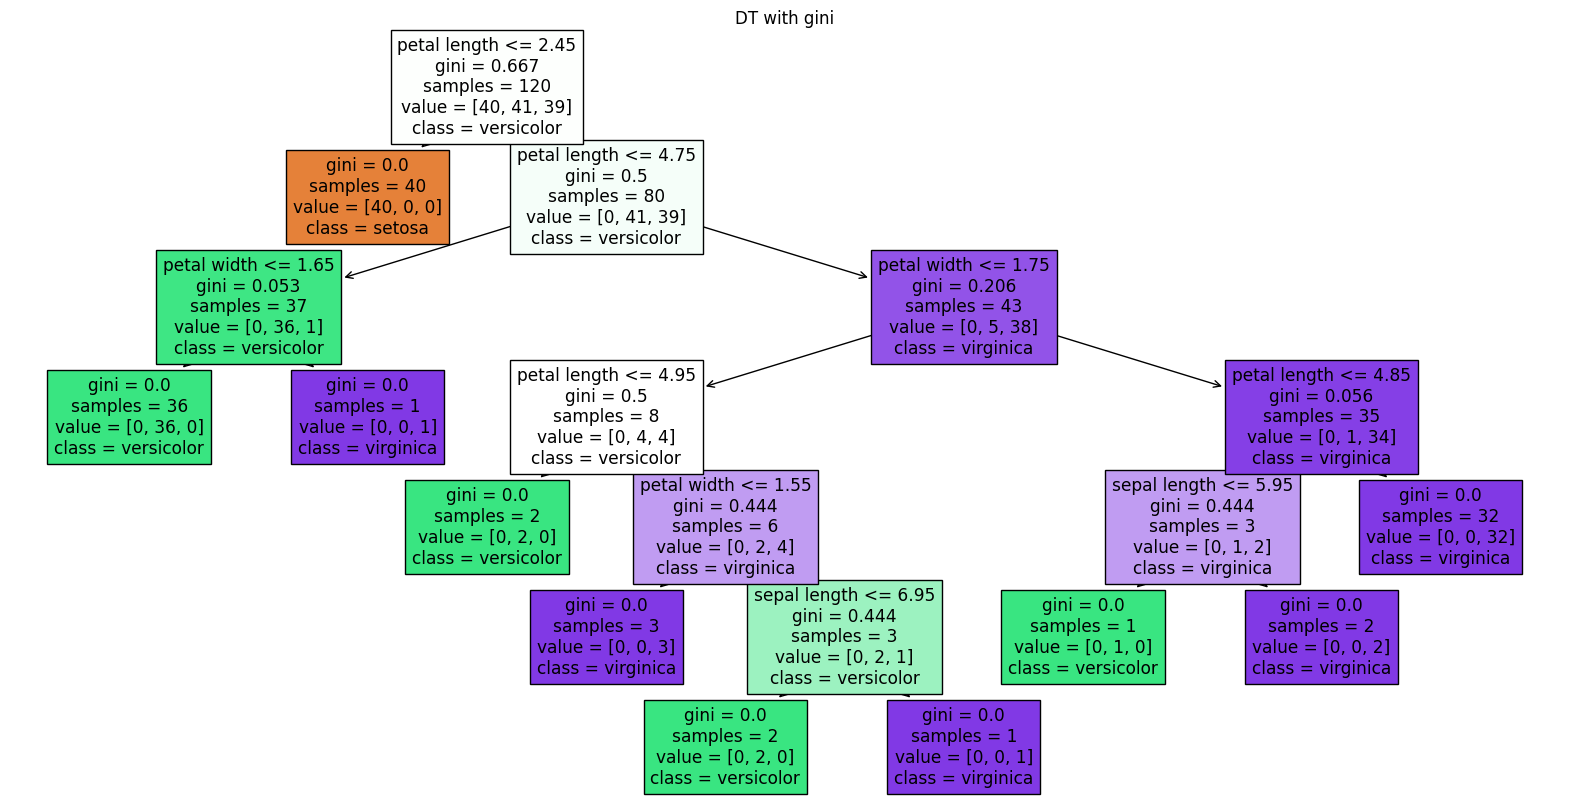

Number of nodes: 19
Depth of tree: 6
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



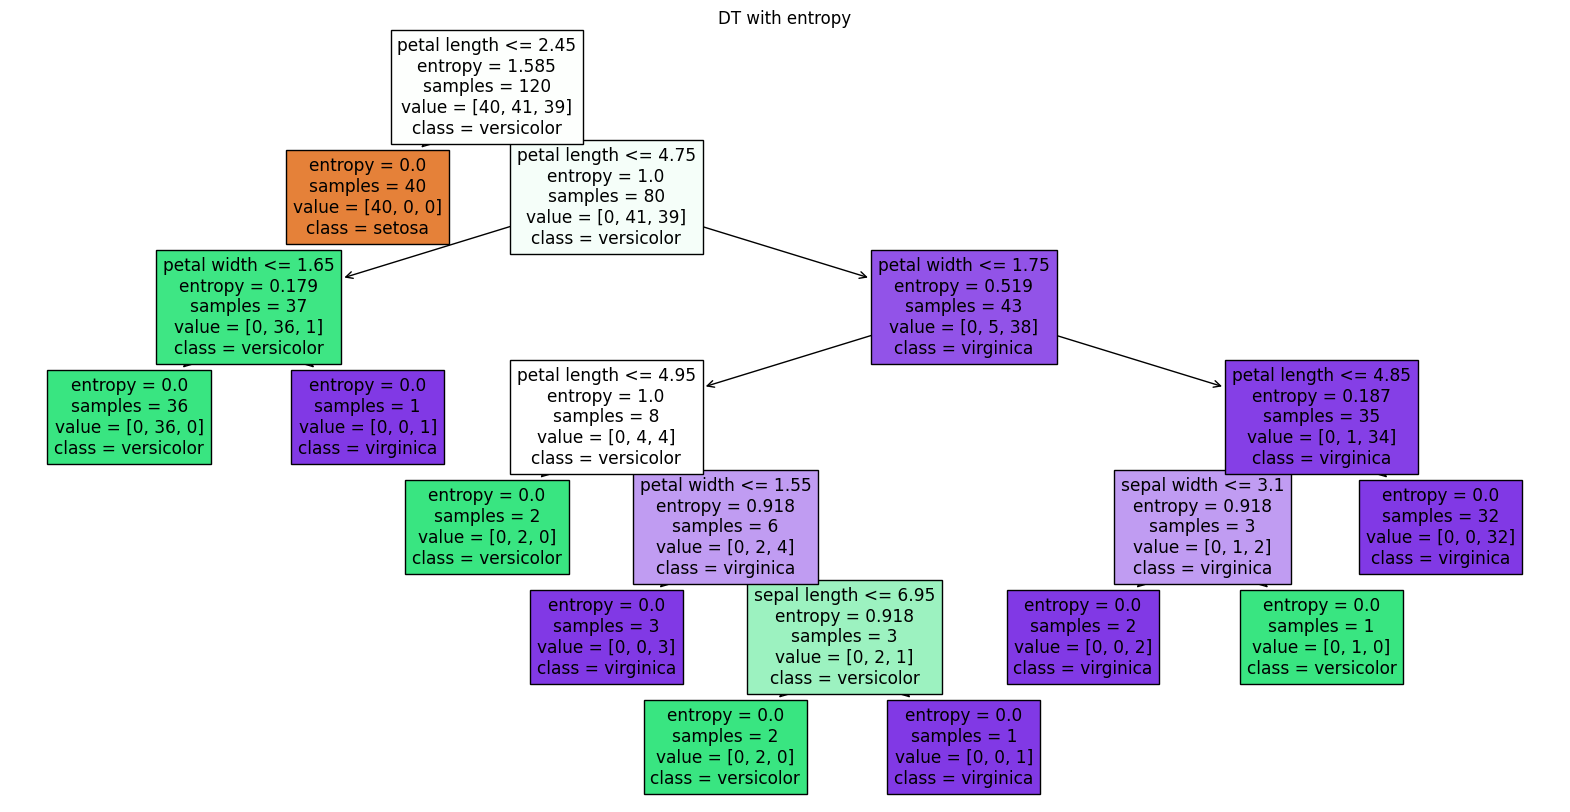

Number of nodes: 19
Depth of tree: 6
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [15]:
# gini
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_iris_tree(clf, "DT with gini")
print(classification_report(y_test, y_pred))

# ----

# entropy
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_iris_tree(clf, "DT with entropy")
print(classification_report(y_test, y_pred))

# comparison between gini and entropy
# ...

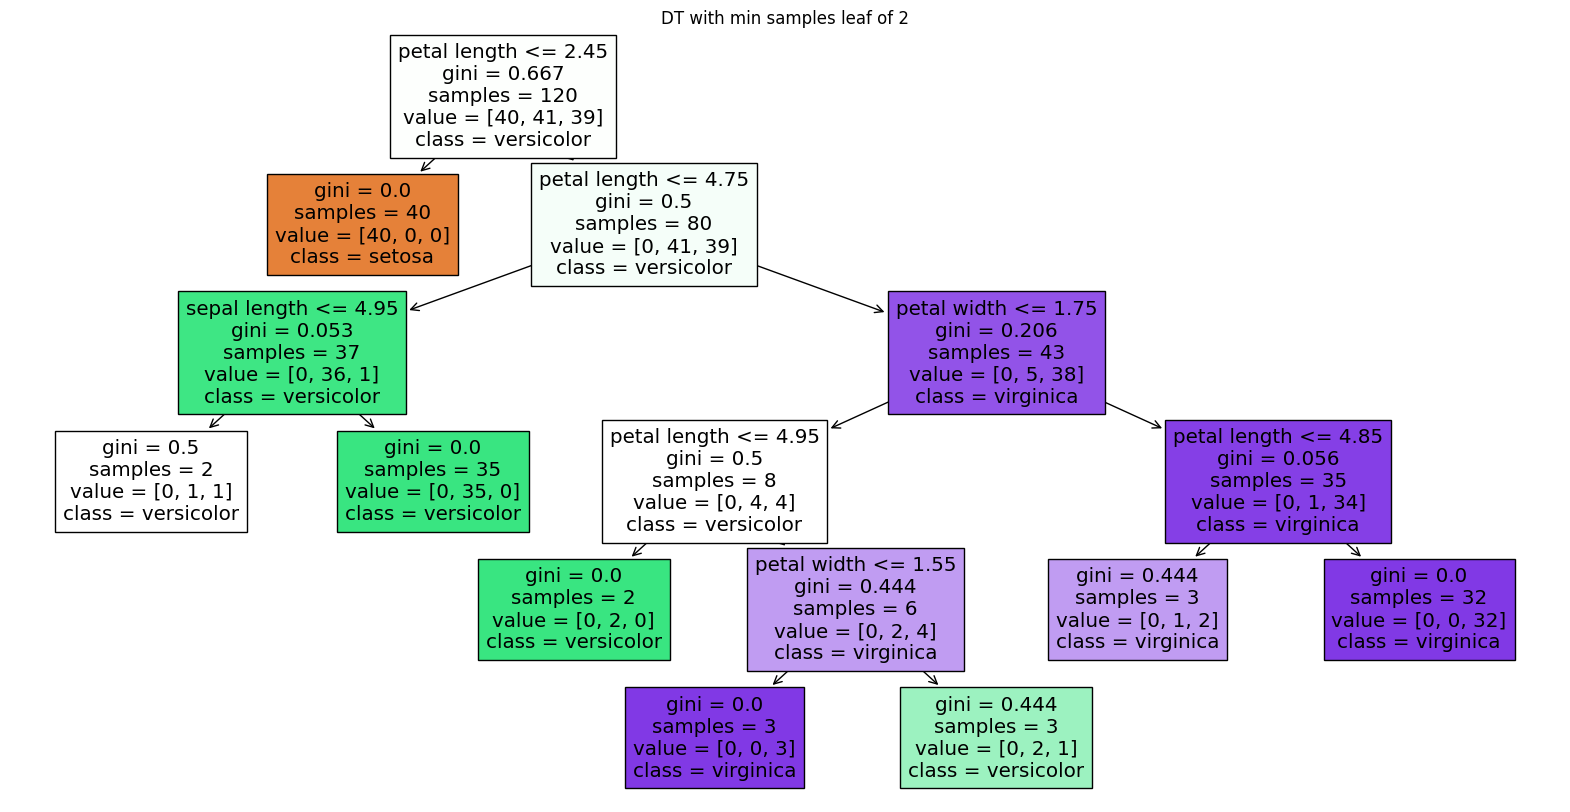

Number of nodes: 15
Depth of tree: 5
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



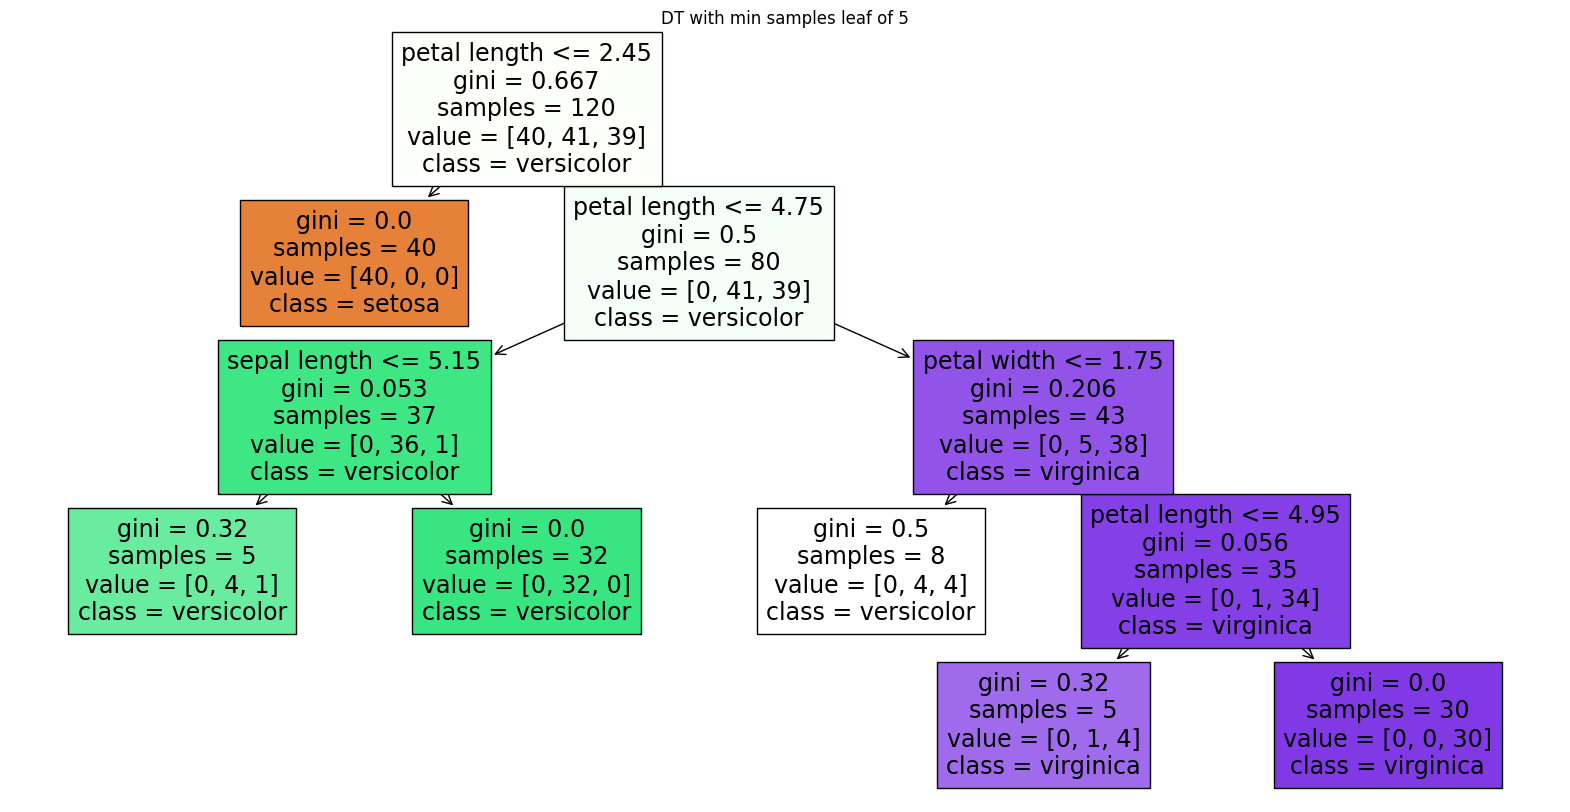

Number of nodes: 11
Depth of tree: 4
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [16]:
# min samples leaf of 2
clf = DecisionTreeClassifier(min_samples_leaf=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_iris_tree(clf, "DT with min samples leaf of 2")
print(classification_report(y_test, y_pred))

# entropy
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_iris_tree(clf, "DT with min samples leaf of 5")
print(classification_report(y_test, y_pred))

# min samples leaf controls the minimum number of samples that a leaf node must contain
# larger values preent overfitting
# larger values result in more shallow trees

- min samples leaf controls the minimum number of samples that a leaf node must contain
- larger values preent overfitting
- larger values result in more shallow trees

## Grid search different parameters

In [11]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, None],
    "min_samples_leaf": [1, 2, 5, 10, 20],
    "ccp_alpha": [0.0, 0.001, 0.01, 0.1, 0.5, 1.0],
}

dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(
    dt_classifier, param_grid, cv=[(slice(None), slice(None))], scoring="accuracy"
)

grid_search.fit(X_train, y_train)
pd.set_option("display.max_rows", None)
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# run classification on the test set
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best params: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1}
Best score: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



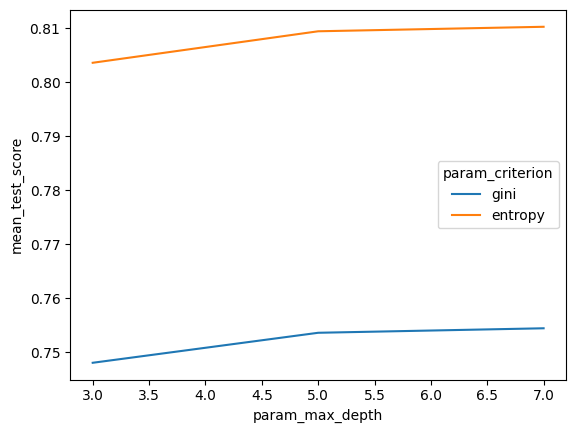

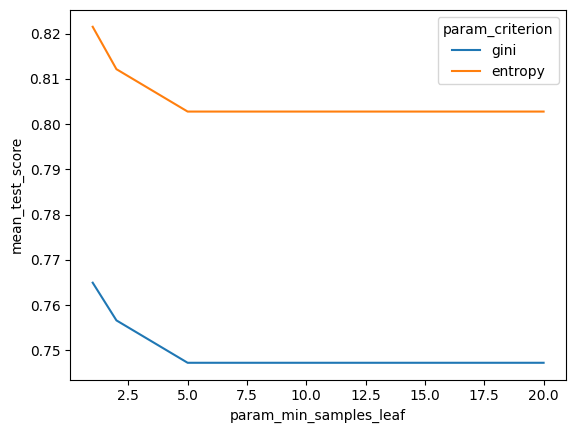

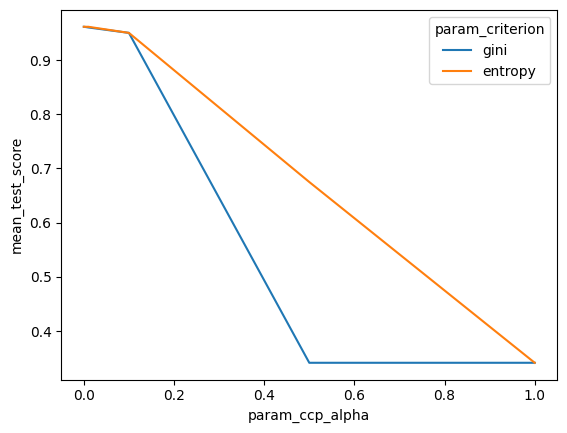

In [61]:
results = grid_search.cv_results_
results_df = pd.DataFrame(results)

# chart accuracy by max depth

sns.lineplot(
    data=results_df,
    x="param_max_depth",
    y="mean_test_score",
    hue="param_criterion",
    errorbar=None,
)
plt.show()

# chart accuracy by min samples leaf
sns.lineplot(
    data=results_df,
    x="param_min_samples_leaf",
    y="mean_test_score",
    hue="param_criterion",
    errorbar=None,
)
plt.show()

# chart accuracy by ccp alpha
sns.lineplot(
    data=results_df,
    x="param_ccp_alpha",
    y="mean_test_score",
    hue="param_criterion",
    errorbar=None,
)
plt.show()

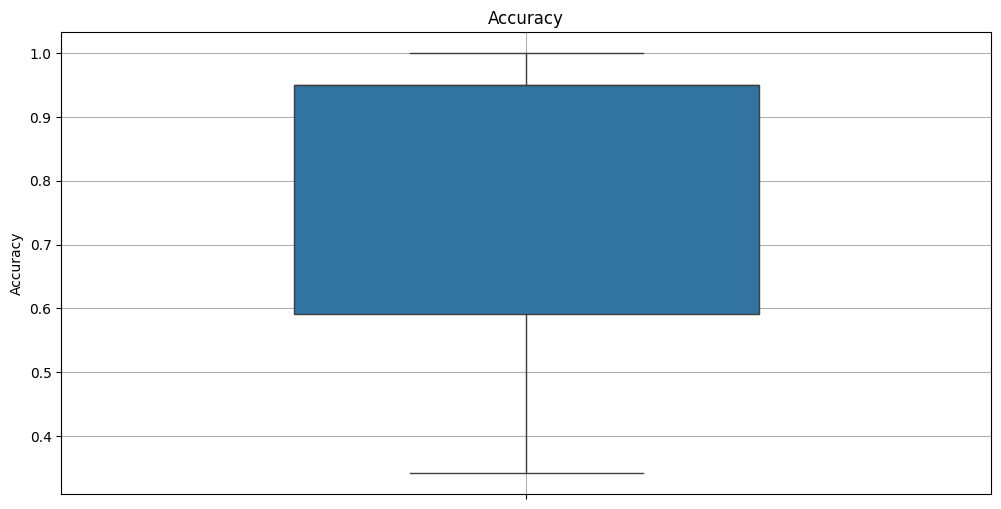

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df["mean_test_score"], width=0.5)
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()

## Cross validation vs stratified cross validation

In [ ]:
def perform_cross_validation(
    pipeline: Pipeline,
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    folds: int = 5,
):
    """
    Perform cross-validation and return the mean scores for specified metrics.

    Parameters:
    - pipeline: The machine learning pipeline that includes preprocessing and a classifier.
    - X_train: Training feature set as a pandas DataFrame.
    - y_train: Training target as a pandas Series.
    - folds: Number of cross-validation folds.

    Returns:
    - A dictionary containing mean scores for accuracy, precision, recall, and F1 score.
    """
    scoring = {
        "accuracy": "accuracy",
        "precision": "precision_macro",
        "recall": "recall_macro",
        "f1": "f1_macro",
    }

    cv_results = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=folds)

    mean_scores = {
        metric: np.mean(scores)
        for metric, scores in cv_results.items()
        if "test_" in metric
    }

    return mean_scores

In [14]:
from sklearn.model_selection import KFold, StratifiedKFold


def run_knn_cross_validation(
    X: pd.DataFrame,
    y: pd.DataFrame,
    K: int = 5,
    stratified: bool = False,
):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    if stratified:
        kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
    else:
        kf = KFold(n_splits=K, shuffle=True, random_state=42)

    dt_classifier = DecisionTreeClassifier()
    grid_search = GridSearchCV(dt_classifier, param_grid, cv=kf, scoring="accuracy")

    grid_search.fit(X_train, y_train)
    pd.set_option("display.max_rows", None)

    # run classification on the test set
    # y_pred = grid_search.predict(X_test)
    # print("Classification Report:")
    # print(classification_report(y_test, y_pred))

    return grid_search

In [15]:
res = run_knn_cross_validation(X_iris, y_iris, 6, stratified=False)
print("Cross validation (without stratification):")
print("Best params: ", res.best_params_)
print("Best accuracy score: ", res.best_score_)

res = run_knn_cross_validation(X_iris, y_iris, 6, stratified=True)
print("Cross validation with stratification:")
print("Best params: ", res.best_params_)
print("Best accuracy score: ", res.best_score_)

Cross validation (without stratification):
Best params:  {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
Best accuracy score:  0.9333333333333332
Cross validation with stratification:
Best params:  {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
Best accuracy score:  0.9500000000000001


Cross validation with stratificaiton vs without stratification 
- stratification ensures  that each fold has approximately the same class distribution as the entire dataset
- accuracy results are better with stratification


## Class_weight parameter

In [77]:
print("Number of samples in each class:")
print(y_iris.value_counts())

Number of samples in each class:
class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
